##### List of Modules

In [1]:
## pandas used to transform given tsv to csv file
import pandas as pd

## CountVectorizer tokenizes the collection of text documents and build a vocabulary of known words it returns ints 
## TfidVectorizer is same as CountVectorizer but it returns float  values. In the below I'd compare the both values it false 
## because float and int are not equal
## 
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer

## from sklearn.linear_model. I'd imported "PassiveAggressiveClassifier, SGDClassifier" for classification 
from sklearn.linear_model import PassiveAggressiveClassifier, SGDClassifier

## from sklearn.svm. I'd imported "LinearSVC" for classication
from sklearn.svm import LinearSVC

## from sklearn.naive_bayes. I'd imported "MultinomialNB" is another kind of classifier most of the Data Scienctist use this
## one for better accuracy
from sklearn.naive_bayes import MultinomialNB

## metrics for predictions 
from sklearn import metrics

## pyplot for visualizing graphs
import matplotlib.pyplot as plt

## shuffle for shuffling the data randomly
from sklearn.utils import shuffle

## classification_report which gives f1-score, precision, recall, support 
from sklearn.metrics import classification_report

## seaborn is used for Data Visualizarion library
## I made confusion matrix for every classifier. So, for visualizing we need seaborn
import seaborn as sns

Given data is .tsv extension. I had converting it into .csv file for training and testing using pandas

In [2]:
train2_tsv = 'train2.tsv'
train2_csv = pd.read_table(train2_tsv,sep = '\t')
train2_csv.to_csv('train2.csv',index = True)

Let's see some train data

In [3]:
train = pd.read_csv('train2.csv')
train.head()

,Unnamed: 0,0,2635.json,false,Says the Annies List political group supports third-trimester abortions on demand.,abortion,dwayne-bohac,State representative,Texas,republican,0.0,1.0,0.0.1,0.0.2,0.0.3,a mailer,"That's a premise that he fails to back up. Annie's List makes no bones about being comfortable with candidates who oppose further restrictions on late-term abortions. Then again, this year its backing two House candidates who voted for more limits."
0,0,1,10540.json,half-true,When did the decline of coal start? It started...,"energy,history,job-accomplishments",scott-surovell,State delegate,Virginia,democrat,0.0,0.0,1.0,1.0,0.0,a floor speech.,"Surovell said the decline of coal ""started whe..."
1,1,2,324.json,mostly-true,"Hillary Clinton agrees with John McCain ""by vo...",foreign-policy,barack-obama,President,Illinois,democrat,70.0,71.0,160.0,163.0,9.0,Denver,Obama said he would have voted against the ame...
2,2,3,1123.json,false,Health care reform legislation is likely to ma...,health-care,blog-posting,NaN,NaN,none,7.0,19.0,3.0,5.0,44.0,a news release,The release may have a point that Mikulskis co...
3,3,4,9028.json,half-true,The economic turnaround started at the end of ...,"economy,jobs",charlie-crist,NaN,Florida,democrat,15.0,9.0,20.0,19.0,2.0,an interview on CNN,"Crist said that the economic ""turnaround start..."
4,4,5,12465.json,true,The Chicago Bears have had more starting quart...,education,robin-vos,Wisconsin Assembly speaker,Wisconsin,republican,0.0,3.0,2.0,5.0,1.0,a an online opinion-piece,"But Vos specifically used the word ""fired,"" wh..."


Now data has been converted csv file. But it doesn't have column name. So, I had grab the what I need for training and then change the data into DataFrame using pandas

In [4]:
train_dict = {'ID':train['0'],'train_statement':train['Says the Annies List political group supports third-trimester abortions on demand.'],
          'Justification':train["That's a premise that he fails to back up. Annie's List makes no bones about being comfortable with candidates who oppose further restrictions on late-term abortions. Then again, this year its backing two House candidates who voted for more limits."],
          'train_label':train['false']}
train_df = pd.DataFrame(train_dict)

Let's see the data now

In [5]:
train_df.head()

,ID,train_statement,Justification,train_label
0,1,When did the decline of coal start? It started...,"Surovell said the decline of coal ""started whe...",half-true
1,2,"Hillary Clinton agrees with John McCain ""by vo...",Obama said he would have voted against the ame...,mostly-true
2,3,Health care reform legislation is likely to ma...,The release may have a point that Mikulskis co...,false
3,4,The economic turnaround started at the end of ...,"Crist said that the economic ""turnaround start...",half-true
4,5,The Chicago Bears have had more starting quart...,"But Vos specifically used the word ""fired,"" wh...",true


Similarly as train data I had converted .tsv file extension into csv file

In [7]:
test2_tsv = 'test2.tsv'
test2_csv = pd.read_table(test2_tsv,sep = '\t')
test2_csv.to_csv('test2.csv',index = False)

In [8]:
test = pd.read_csv('test2.csv')
test.head()

,0,11972.json,true,Building a wall on the U.S.-Mexico border will take literally years.,immigration,rick-perry,Governor,Texas,republican,30,30.1,42,23,18,Radio interview,"Meantime, engineering experts agree the wall would most likely take years to complete. Keep in mind, too, it took more than six years to build roughly 700 miles of fence and barriers along the roughly 2,000-mile U. S. -Mexico border."
0,1,11685.json,false,Wisconsin is on pace to double the number of l...,jobs,katrina-shankland,State representative,Wisconsin,democrat,2,1,0,0,0,a news conference,She cited layoff notices received by the state...
1,2,11096.json,false,Says John McCain has done nothing to help the ...,"military,veterans,voting-record",donald-trump,President-Elect,New York,republican,63,114,51,37,61,comments on ABC's This Week.,"Trump said that McCain ""has done nothing to he..."
2,3,5209.json,half-true,Suzanne Bonamici supports a plan that will cut...,"medicare,message-machine-2012,campaign-adverti...",rob-cornilles,consultant,Oregon,republican,1,1,3,1,1,a radio show,"But spending still goes up. In addition, many ..."
3,4,9524.json,pants-fire,When asked by a reporter whether hes at the ce...,"campaign-finance,legal-issues,campaign-adverti...",state-democratic-party-wisconsin,NaN,Wisconsin,democrat,5,7,2,2,7,a web video,Our rating A Democratic Party web video making...
4,5,5962.json,true,Over the past five years the federal governmen...,"federal-budget,pensions,retirement",brendan-doherty,NaN,Rhode Island,republican,1,2,1,1,0,a campaign website,Rhode Islands former top cop is setting his ba...


In [9]:
test_dict = {'ID':test['0'],'test_statement':test['Building a wall on the U.S.-Mexico border will take literally years.'],
          'Justification':test['Meantime, engineering experts agree the wall would most likely take years to complete. Keep in mind, too, it took more than six years to build roughly 700 miles of fence and barriers along the roughly 2,000-mile U. S. -Mexico border.'],
          'test_label':test['true']}
test_df = pd.DataFrame(test_dict)

Let's see the test data

In [10]:
test_df.head()

,ID,test_statement,Justification,test_label
0,1,Wisconsin is on pace to double the number of l...,She cited layoff notices received by the state...,false
1,2,Says John McCain has done nothing to help the ...,"Trump said that McCain ""has done nothing to he...",false
2,3,Suzanne Bonamici supports a plan that will cut...,"But spending still goes up. In addition, many ...",half-true
3,4,When asked by a reporter whether hes at the ce...,Our rating A Democratic Party web video making...,pants-fire
4,5,Over the past five years the federal governmen...,Rhode Islands former top cop is setting his ba...,true


In [11]:
## CountVectorizer tokenizes the collection of text documents and build a vocabulary of known words it returns ints 
count_vectorizer = CountVectorizer(stop_words = 'english')

## function of fit_transform is fit and transform the function for feature extraction 
count_train = count_vectorizer.fit_transform(train_df['train_statement'])

## transforms documents to document-type matrix
count_test = count_vectorizer.transform(test_df['test_statement'])

In [12]:
## TfidVectorizer is same as CountVectorizer but it returns float  values. In the below I'd compare the both values it false 
tfidf_vectorizer = TfidfVectorizer(stop_words='english', max_df=0.7)

## function of fit_transform is fit and transform the function for feature extraction 
tfidf_train = tfidf_vectorizer.fit_transform(train_df['train_statement'])

## transforms documents to document-type matrix
tfidf_test = tfidf_vectorizer.transform(test_df['test_statement'])

Let's see the feature names names and their matrix values

In [13]:
print(tfidf_vectorizer.get_feature_names()[:10])
print(tfidf_train.A[:5])

['00', '000', '000new', '014', '02', '024', '029', '033', '036', '04']
[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]


Below code let you know that CountVectorizer rerurns integer and TfidfVectorizer returns the float values values for the same dataset. Finally I'd compare the two values.

In [14]:
count_df = pd.DataFrame(count_train.A, columns=count_vectorizer.get_feature_names())
tfidf_df = pd.DataFrame(tfidf_train.A, columns=tfidf_vectorizer.get_feature_names())
print(count_df.head())
print(tfidf_df.head())
difference = set(count_df.columns) - set(tfidf_df.columns)
print(difference)
print(count_df.equals(tfidf_df))

   00  000  000new  014  02  024  029  033  036  04     ...       zip  zippo  \
0   0    0       0    0   0    0    0    0    0   0     ...         0      0   
1   0    0       0    0   0    0    0    0    0   0     ...         0      0   
2   0    0       0    0   0    0    0    0    0   0     ...         0      0   
3   0    0       0    0   0    0    0    0    0   0     ...         0      0   
4   0    0       0    0   0    0    0    0    0   0     ...         0      0   

   zombie  zombies  zone  zones  zoning  zoo  zuckerberg  zuckerbergs  
0       0        0     0      0       0    0           0            0  
1       0        0     0      0       0    0           0            0  
2       0        0     0      0       0    0           0            0  
3       0        0     0      0       0    0           0            0  
4       0        0     0      0       0    0           0            0  

[5 rows x 11914 columns]
    00  000  000new  014   02  024  029  033  036   04     ..

## Multinomial Naive Bayes Classifier

In [19]:
## Instantiate a Multinomial Naive Bayes classifier: nb_classifier
nb_classifier = MultinomialNB()

## Fit the classifier to the training data
nb_classifier.fit(count_train, train_df['train_label'])

## Create the predicted tags: pred
mnb_pred = nb_classifier.predict(count_test)

# Create the predicted tags: pred
mnb_score = metrics.accuracy_score(test_df['test_label'], mnb_pred)

# Calculate the confusion matrix: mnb_cm
mnb_cm = metrics.confusion_matrix(test_df['test_label'], mnb_pred, labels=['true', 'false'])
print('Confusion Matrix --- Multinomial Naive Bayes')
print(mnb_cm)
print("Multinomial Naive Bayes classifier accuracy:   %0.3f" % mnb_score)

Confusion Matrix --- Multinomial Naive Bayes
[[36 42]
 [30 64]]
Multinomial Naive Bayes classifier accuracy:   0.237


Below code shows the confusion matrix in a graphical form for Multinomial Naive Bayes classifier and classification reports

              precision    recall  f1-score   support

 barely-true       0.23      0.18      0.20       212
       false       0.24      0.26      0.25       249
   half-true       0.24      0.32      0.28       265
 mostly-true       0.22      0.29      0.25       241
  pants-fire       0.25      0.05      0.09        92
        true       0.25      0.17      0.21       207

    accuracy                           0.24      1266
   macro avg       0.24      0.21      0.21      1266
weighted avg       0.24      0.24      0.23      1266



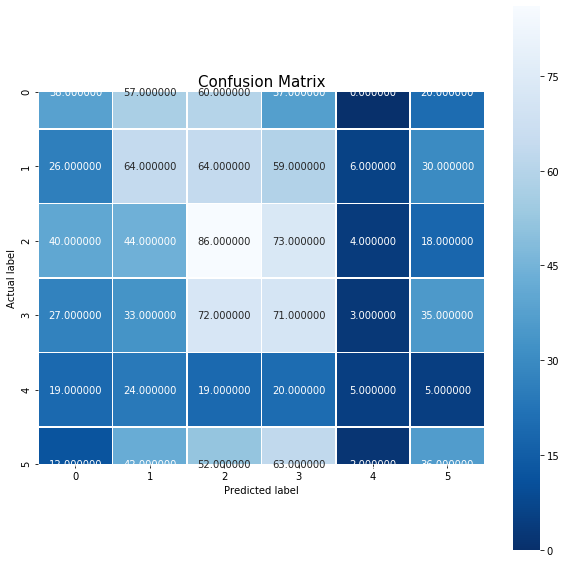

In [16]:
mnb_cm = metrics.confusion_matrix(test_df['test_label'],mnb_pred)
plt.show()
plt.figure(figsize=(10,10))
sns.heatmap(mnb_cm, annot=True, linewidth=.5, square = True, cmap = 'Blues_r',fmt='f');
plt.ylabel('Actual label');
plt.xlabel('Predicted label');
plt.title('Confusion Matrix', size = 15);

report = classification_report(test_df['test_label'],mnb_pred)
print(report)

## Passive Aggressive Classifier

In [20]:
## Instantiating a Passive Aggressive Classifier : pa_tfidf_clf
pa_tfidf_clf = PassiveAggressiveClassifier()

## Fit the classifier to the training data
pa_tfidf_clf.fit(count_train, train_df['train_label'])

## Create the predicted tags: pac_pred
pac_pred = pa_tfidf_clf.predict(count_test)
## Calculate the accuracy score: pac_score
pac_score = metrics.accuracy_score(test_df['test_label'], pac_pred)

## Calculate the confusion matrix: pac_cm
pac_cm = metrics.confusion_matrix(test_df['test_label'], pac_pred, labels=['true', 'false'])
print('Confusion Matrix --- PassiveAggressiveClassifier')
print(pac_cm)
print("Passive Aggressive Classifier accuracy:   %0.3f" % pac_score)

Confusion Matrix --- PassiveAggressiveClassifier
[[43 46]
 [39 81]]
Passive Aggressive Classifier accuracy:   0.227


Below code shows the confusion matrix in a graphical form for PassiveAggressiveClassifier and classification reports

              precision    recall  f1-score   support

 barely-true       0.22      0.19      0.21       212
       false       0.28      0.33      0.30       249
   half-true       0.23      0.22      0.23       265
 mostly-true       0.20      0.20      0.20       241
  pants-fire       0.18      0.20      0.19        92
        true       0.20      0.21      0.20       207

    accuracy                           0.23      1266
   macro avg       0.22      0.22      0.22      1266
weighted avg       0.23      0.23      0.23      1266



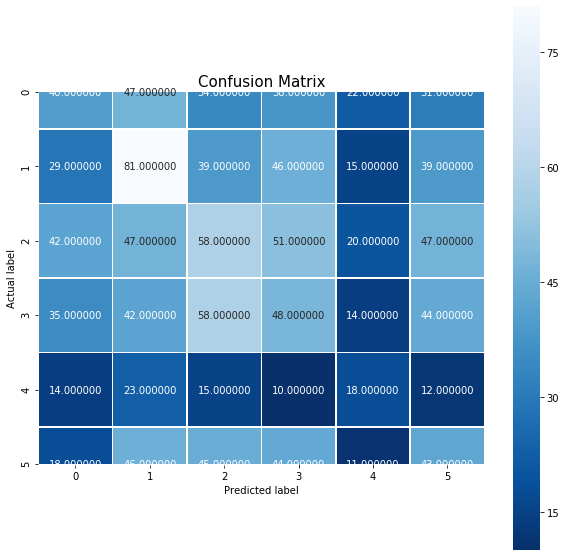

In [21]:
pac_cm = metrics.confusion_matrix(test_df['test_label'],pac_pred)
plt.show()
plt.figure(figsize=(10,10))
sns.heatmap(pac_cm, annot=True, linewidth=.5, square = True, cmap = 'Blues_r',fmt='f');
plt.ylabel('Actual label');
plt.xlabel('Predicted label');
plt.title('Confusion Matrix', size = 15);

report = classification_report(test_df['test_label'],pac_pred)
print(report)

## Support Vector Classifier

In [22]:
## Instantiate a Support Vector classifier: svc_tfidf_clf
svc_tfidf_clf = LinearSVC()

## Fit the classifier to the training data
svc_tfidf_clf.fit(count_train, train_df['train_label'])

## Create the predicted tags: svc_pred
svc_pred = svc_tfidf_clf.predict(count_test)

## Calculate the accuracy score: svc_score
svc_score = metrics.accuracy_score(test_df['test_label'], svc_pred)

## Calculate the confusion matrix: cm
svc_cm = metrics.confusion_matrix(test_df['test_label'], svc_pred, labels=['true', 'false'])
print('Confusion Matrix --- LinearSVC')
print(svc_cm)
print("accuracy:   %0.3f" % svc_score)

Confusion Matrix --- LinearSVC
[[53 41]
 [39 75]]
accuracy:   0.235


Below code shows the confusion matrix in a graphical form for SVCClassifier and classification reports

              precision    recall  f1-score   support

 barely-true       0.25      0.22      0.23       212
       false       0.27      0.30      0.29       249
   half-true       0.24      0.22      0.23       265
 mostly-true       0.20      0.21      0.20       241
  pants-fire       0.16      0.15      0.15        92
        true       0.24      0.26      0.25       207

    accuracy                           0.23      1266
   macro avg       0.23      0.23      0.23      1266
weighted avg       0.23      0.23      0.23      1266



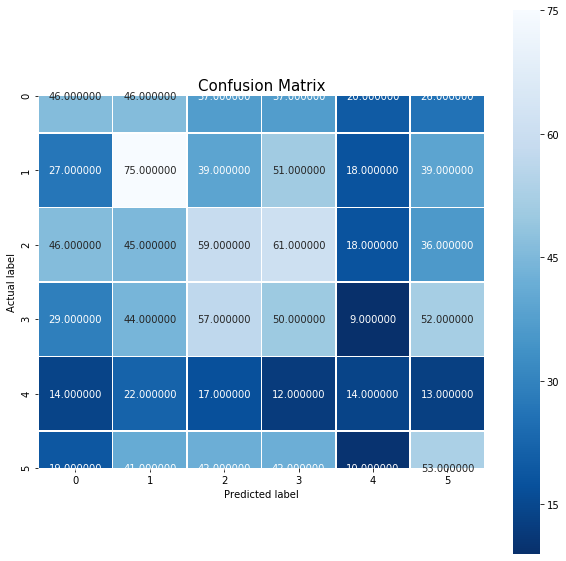

In [23]:
svc_cm = metrics.confusion_matrix(test_df['test_label'],svc_pred)
plt.show()
plt.figure(figsize=(10,10))
sns.heatmap(svc_cm, annot=True, linewidth=.5, square = True, cmap = 'Blues_r',fmt='f');
plt.ylabel('Actual label');
plt.xlabel('Predicted label');
plt.title('Confusion Matrix', size = 15);

report = classification_report(test_df['test_label'],svc_pred)
print(report)

## Stochastic Gradient Descent Classifier

In [25]:
## Instantiate a Multinomial Naive Bayes classifier: sgd_tfidf_clf
sgd_tfidf_clf = SGDClassifier()

## Fit the classifier to the training data
sgd_tfidf_clf.fit(count_train, train_df['train_label'])

## Create the predicted tags: sgd_pred
sgd_pred = sgd_tfidf_clf.predict(count_test)

## Calculate the accuracy score: score
sgd_score = metrics.accuracy_score(test_df['test_label'], sgd_pred)

## Calculate the confusion matrix: cm
sgd_cm = metrics.confusion_matrix(test_df['test_label'], sgd_pred, labels=['true', 'false'])
print('Confusion Matrix --- SGD Classifier')
print(sgd_cm)

print("accuracy:   %0.3f" % sgd_score)

Confusion Matrix --- SGD Classifier
[[57 35]
 [35 72]]
accuracy:   0.242


Below code shows the confusion matrix in a graphical form for SGDClassifier and classification reports


              precision    recall  f1-score   support

 barely-true       0.26      0.28      0.27       212
       false       0.28      0.29      0.29       249
   half-true       0.23      0.22      0.22       265
 mostly-true       0.20      0.17      0.18       241
  pants-fire       0.19      0.21      0.20        92
        true       0.26      0.28      0.27       207

    accuracy                           0.24      1266
   macro avg       0.24      0.24      0.24      1266
weighted avg       0.24      0.24      0.24      1266



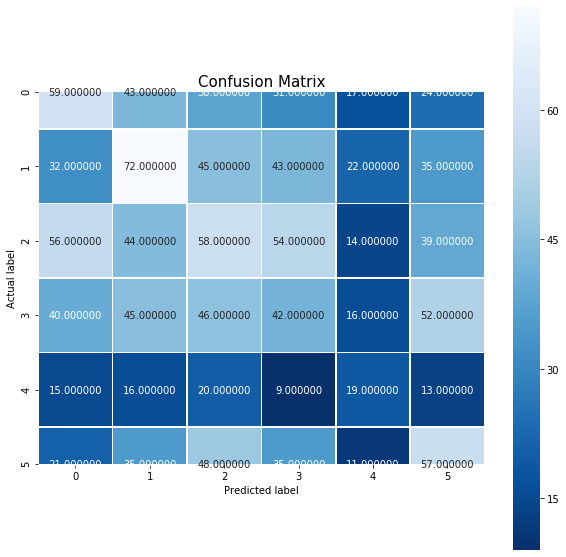

In [27]:
sgd_cm = metrics.confusion_matrix(test_df['test_label'],sgd_pred)
plt.show()
plt.figure(figsize=(10,10))
sns.heatmap(sgd_cm, annot=True, linewidth=.5, square = True, cmap = 'Blues_r',fmt='f');
plt.ylabel('Actual label');
plt.xlabel('Predicted label');
plt.title('Confusion Matrix', size = 15);

report = classification_report(test_df['test_label'],sgd_pred)
print(report)